# ch03.05. 기초통계 - 산포통계량
---
* 날짜:
* 이름:

## 학습내용
    * 산포 통계량
      - 분산
      - 표준편차
      - 변동계수
      - 스케일링
      - 범위와 사분위 범위

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##  산포 통계
---

* 산포란 데이터가 얼마나 퍼져있는지를 의미

* 따라서 산포 통계량이란 데이터의 산포를 나타내는 통계량이라 할 수 있다.

### **| 데이터 생성**

```
# 아래의 함수는 정규분포를 따르는 랜덤한 실수를 반환합니다.
np.random.normal(loc, scale, size)
# loc = 평균
# scale = 표준편차
# size = 추출할 데이터(표본)의 크기
```


* 평균 0, 표준편차 1인 정규분포 데이터 1000개를 생성하기

In [ ]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a1`로 바인딩
a1= np.random.normal(0, 1, 1000)
# 판다스 시리즈 `s1`로 바인딩
s1= pd.Series(a1)

* 평균 0, 표준편차 3인 정규분포 데이터 1000개를 생성하기

In [ ]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a3`로 바인딩
a3= np.random.normal(0, 3, 1000)
# 판다스 시리즈 `s3`로 바인딩
s3= pd.Series(a3)

* `a1`와 `a3`의 분포 그리기

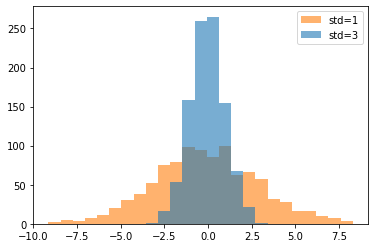

In [ ]:
plt.hist([a1,a3], alpha=.6, histtype='stepfilled', bins=25)
plt.legend(['std=1', 'std=3'])
plt.show()

### **| 분산**

\begin{align}
var(x) = \frac{\sum^{n}_{i=1}(x_i-\mu)^2}{n-1} 
\end{align}
\begin{align}
 & \\
 & x_i :? \\
 & \mu : ?\\
 & n : ?\\ 
\end{align}


```
np.var(a, ddof) 
a.var(ddof)
s.var(ddof)
```

* `a1`과 `a3`의 분산을 계산

In [ ]:
print('a1분산:', np.var(a1, ddof=1),'\n', 'a3분산:', a3.var(ddof=1))

a1분산: 0.9752096659781323 
 a3분산: 8.776886993803192


### **| 표준편차**


\begin{align}
std(x)= \sqrt{var(x)} = 
\sqrt{\frac{\sum^{n}_{i=1}(x_i-\mu)^2}{n-1}} 
\end{align}
\begin{align}
 & \\
 & x_i : ? \\
 & \mu : ?\\
 & n : ?\\ 
\end{align}


```
np.std(a, ddof) 
a.std(ddof)
s.std(ddof)
```

* `a1`과 `a3`의 표준편차 계산

In [ ]:
print('a1표준편차:', np.std(a1, ddof=1),'\n', 'a3표준편차:', a3.std(ddof=1))

a1표준편차: 0.9875270456945128 
 a3표준편차: 2.9625811370835384


* `a1`의 분산과 `a1`의 표준편차제곱을 비교

In [ ]:
print('a1분산:', np.var(a1, ddof=1), 'a1표준편차제곱:', np.std(a1, ddof=1)**2)

a1분산: 0.9752096659781323 a1표준편차제곱: 0.9752096659781323


### **| 변동계수**

분산 혹은 표준편차를 스케일에 영향을 받지 않도록 데이터를 스케일링 한 후 분산 혹은 표준편차를 계산


\begin{align}
변동계수 = \frac{var(x) \ or \ std(x) }{Scale(x)} 
\end{align}


#### **변동계수의 필요성**

* `a1`의 모든 요소에 10을 곱한 배열 `a10`을 생성

In [ ]:
a10=a1*10

* `a1`과 `a10`의 분산 계산

In [ ]:
print('a1 분산:',np.var(a1, ddof=1),'\n','a10 분산:', np.var(a10, ddof=1))

a1 분산: 0.9752096659781323 
 a10 분산: 97.52096659781323


#### **스케일링: min-max**

**min-max scaling** : 최대값을 1로, 최소값을 0으로 스켕일링 하는  기법.

\begin{align}
minmax(x)=\frac{x-min(x)}{max(x)-min(x)}
\end{align}

\begin{align}
 & \\
 & x : ? \\
 & min(x) : ?\\
 & max(x) : ?\\ 
\end{align}



* min-max 함수 생성

In [ ]:
def minmax(x):
  return (x-min(x))/(max(x)-min(x))

* `a1`을 min-max scaling 하여 `a1_minmax` 로 바인딩

In [ ]:
a1_minmax = minmax(a1)

* `a10`을 min-max scaling 하여 `a10_minmax` 로 바인딩

In [ ]:
a10_minmax = minmax(a10)

* `a1`과 `a1_minmax`의 분포를 (1x2) 플롯에 그려 비교하기

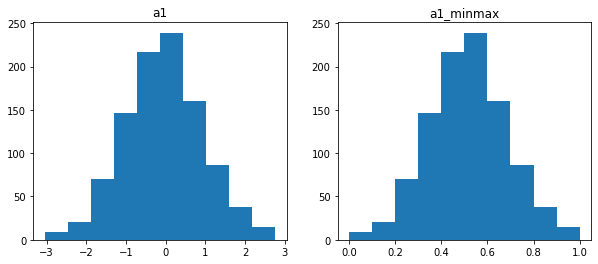

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

axes[0].hist(a1)
axes[0].set_title('a1')
axes[1].hist(a1_minmax)
axes[1].set_title('a1_minmax')
plt.show()



* `a10`과 `a10_minmax`의 분포를 (1x2) 플롯에 그려 비교하기

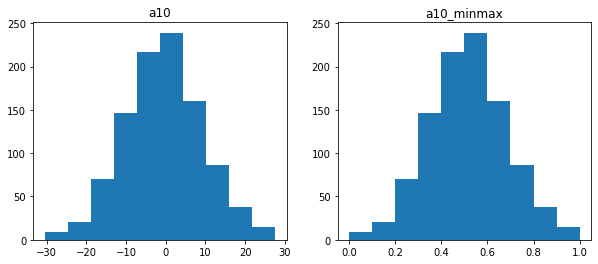

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

axes[0].hist(a10)
axes[0].set_title('a10')
axes[1].hist(a10_minmax)
axes[1].set_title('a10_minmax')
plt.show()



* `a1`과 `a10` 두 데이터의 스케일링 전, 후 데이터가 가지는 값의 범위를 요약하기

In [ ]:
# 두 데이터 모두 스케일링 후 0-1 사이 값으로 바뀜

* 스케일링 후 `a1_minmax`, `a10_minmax`의 분산 구하기

In [ ]:
print('a1_minmax 분산:',np.var(a1_minmax, ddof=1),'\n','a10_minmax 분산:', np.var(a10_minmax, ddof=1))
# 분산값이 거의 같아짐

a1_minmax 분산: 0.028934701900306115 
 a10_minmax 분산: 0.02893470190030611


#### **스케일링: z-score**

**standard(z-socre) scaling** : 최대값을 1로, 최소값을 0으로 스켕일링 하는  기법.

\begin{align}
\\
standard(x)=\frac{x-\mu}{\sigma}
\end{align}
\begin{align}
 & \\
 & x : ? \\
 & \mu : ?\\
 & \sigma : ?\\ 
\end{align}


* standard 함수 생성

In [ ]:
def standard(x):
  return (x-np.mean(x))/np.std(x,ddof=1)

* `a1`을 standard 하여 `a1_standard` 로 바인딩

In [ ]:
a1_standard = standard(a1)

* `a10`을 standard 하여 `a10_standard` 로 바인딩

In [ ]:
a10_standard = standard(a10)

* `a1`과 `a10_standard`의 분포를 (1x2) 플롯에 그려 비교하기

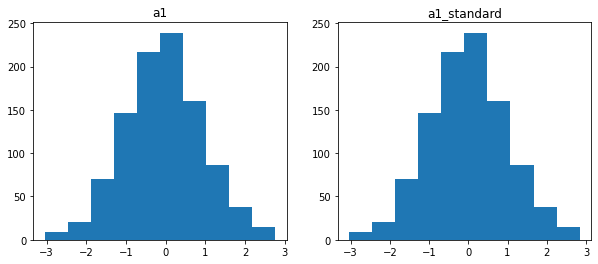

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

axes[0].hist(a1)
axes[0].set_title('a1')
axes[1].hist(a1_standard)
axes[1].set_title('a1_standard')
plt.show()

* `a10`과 `a10_standard`의 분포를 (1x2) 플롯에 그려 비교하기

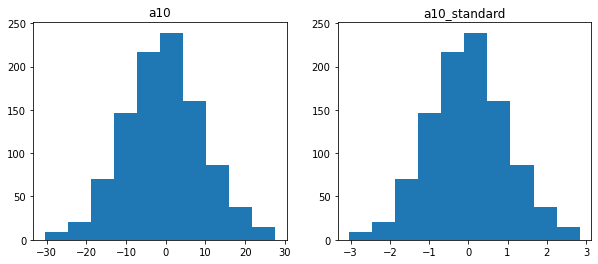

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

axes[0].hist(a10)
axes[0].set_title('a10')
axes[1].hist(a10_standard)
axes[1].set_title('a10_standard')
plt.show()

* `a1`과 `a10` 두 데이터의 스케일링 전, 후 데이터가 가지는 값의 범위를 요약하기

In [ ]:
# standard 스케일링 후 평균0의 표준편차1인 분포로 바뀌었다.

* 스케일링 후 `a1_standard`, `a10_standard`의 분산 구하기

In [ ]:
np.var(a1_standard,ddof=1), np.var(a10_standard,ddof=1)

(1.0, 1.0000000000000002)

### **| 범위와 사분위 범위**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0305-01.png?raw=true?raw=true width=800>
</p>


* `a10` 의 분포 그리기

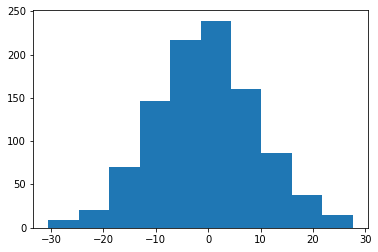

In [ ]:
plt.hist(a10)
plt.show()

#### **범위**

\begin{align}
\\
범위 = max(x)-min(x)
\end{align}

```
np.ptp(x)
```

* `a10`의 범위 구하기

In [ ]:
print(np.ptp(a10),'\n',max(a10)-min(a10))

58.05498168821509 
 58.05498168821509



#### **사분위 범위**

\begin{align}
\\
사분위 범위 = 3사분위수 - 1사분위수 = 하위 75 \% 수 - 하위 25\% 수
\end{align}

```
np.quntile(x, percent)
```

* `a10`의 사분위 범위 구하기

In [ ]:
np.quantile(a10, 0.75) - np.quantile(a10, 0.25)

13.053706612482689